In [1]:
# data science imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

# data processing
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

# unsupervised algorithms
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

# metrics
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
# pandas display options
pd.set_option('display.max_columns', None)
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_rows", None)

In [3]:
df = pd.read_csv('crypto_data.csv')
df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1252 entries, 0 to 1251
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1252 non-null   object 
 1   CoinName         1252 non-null   object 
 2   Algorithm        1252 non-null   object 
 3   IsTrading        1252 non-null   bool   
 4   ProofType        1252 non-null   object 
 5   TotalCoinsMined  744 non-null    float64
 6   TotalCoinSupply  1252 non-null   object 
dtypes: bool(1), float64(1), object(5)
memory usage: 60.0+ KB


In [5]:
df.describe()

,TotalCoinsMined
count,7.440000e+02
mean,3.883103e+09
std,3.867263e+10
min,-5.917978e+09
25%,6.322164e+05
50%,1.340427e+07
75%,9.399895e+07
max,9.899887e+11


In [6]:
df.IsTrading.value_counts()

True     1144
False     108
Name: IsTrading, dtype: int64

In [7]:
df = df.rename(columns={'Unnamed: 0': 'CoinID'})
df.head()

,CoinID,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


Data Cleaning and Sorting:

In [8]:
df_sub = df.loc[df.IsTrading].reset_index(drop=True)
df_sub.head()

,CoinID,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [9]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144 entries, 0 to 1143
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CoinID           1144 non-null   object 
 1   CoinName         1144 non-null   object 
 2   Algorithm        1144 non-null   object 
 3   IsTrading        1144 non-null   bool   
 4   ProofType        1144 non-null   object 
 5   TotalCoinsMined  685 non-null    float64
 6   TotalCoinSupply  1144 non-null   object 
dtypes: bool(1), float64(1), object(5)
memory usage: 54.9+ KB


In [10]:
df_sub.drop(['IsTrading'], axis=1, inplace=True)
df_sub.head()

,CoinID,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [11]:
df_sub = df_sub.dropna(axis=0, how='any', inplace=False)
df_sub.head()

,CoinID,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000


In [12]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 685 entries, 0 to 1143
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CoinID           685 non-null    object 
 1   CoinName         685 non-null    object 
 2   Algorithm        685 non-null    object 
 3   ProofType        685 non-null    object 
 4   TotalCoinsMined  685 non-null    float64
 5   TotalCoinSupply  685 non-null    object 
dtypes: float64(1), object(5)
memory usage: 37.5+ KB


In [13]:
df_sub = df_sub.loc[df_sub.TotalCoinsMined > 0].reset_index(drop=True)
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CoinID           532 non-null    object 
 1   CoinName         532 non-null    object 
 2   Algorithm        532 non-null    object 
 3   ProofType        532 non-null    object 
 4   TotalCoinsMined  532 non-null    float64
 5   TotalCoinSupply  532 non-null    object 
dtypes: float64(1), object(5)
memory usage: 25.1+ KB


In [14]:
df_sub.drop(['CoinName'], axis=1, inplace=True)
df_sub.head()

,CoinID,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,Scrypt,PoW/PoS,4.199995e+01,42
1,404,Scrypt,PoW/PoS,1.055185e+09,532000000
2,1337,X13,PoW/PoS,2.927942e+10,314159265359
3,BTC,SHA-256,PoW,1.792718e+07,21000000
4,ETH,Ethash,PoW,1.076842e+08,0


In [15]:
for col in df_sub.columns:
    print(col)
    print(df_sub[col].value_counts())
    print()

CoinID
42        1
LTHN      1
PCOIN     1
MONK      1
LCP       1
TROLL     1
IRL       1
GUN       1
WAGE      1
SPK       1
SUCR      1
PHO       1
PNX       1
POP       1
LTCU      1
GER       1
AC3       1
XIN       1
KLKS      1
BWK       1
DAXX      1
COAL      1
XUN       1
CNBC      1
XSH       1
BCD       1
ECA       1
TAU       1
MAG       1
GBX       1
ELLA      1
INN       1
UBTC      1
ITZ       1
TPAY      1
MCT       1
MEDIC     1
BTL       1
IC        1
BRIA      1
BSX       1
ADK       1
PSD       1
TUBE      1
CLO       1
ONT       1
VLX       1
ELP       1
PUSHI     1
POA       1
SPD       1
CIF       1
LOT       1
FLIP      1
LCC       1
BBP       1
TOKC      1
KREDS     1
TRF       1
SSS       1
NBR       1
USX       1
MUN       1
TRTL      1
MBC       1
PURA      1
BLHC      1
404       1
VUC       1
ONX       1
SIGT      1
SMART     1
GCN       1
BTX       1
ONION     1
XLC       1
LINDA     1
DAS       1
ARC       1
SOCC      1
BRIT      1
UNIFY     1
BTPL     

In [16]:
df_sub["TotalCoinSupply"] = df_sub.TotalCoinSupply.astype(float)
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CoinID           532 non-null    object 
 1   Algorithm        532 non-null    object 
 2   ProofType        532 non-null    object 
 3   TotalCoinsMined  532 non-null    float64
 4   TotalCoinSupply  532 non-null    float64
dtypes: float64(2), object(3)
memory usage: 20.9+ KB


In [17]:
#So I can use CoinID for plotting later
df_CoinID = df_sub.CoinID
df_CoinID.head()

0      42
1     404
2    1337
3     BTC
4     ETH
Name: CoinID, dtype: object

In [18]:
df_sub.drop(['CoinID'], axis=1, inplace=True)
df_sub.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,4.200000e+01
1,Scrypt,PoW/PoS,1.055185e+09,5.320000e+08
2,X13,PoW/PoS,2.927942e+10,3.141593e+11
3,SHA-256,PoW,1.792718e+07,2.100000e+07
4,Ethash,PoW,1.076842e+08,0.000000e+00


In [19]:
print(df_sub.ProofType.nunique())
df_sub.ProofType.value_counts()

25


PoW                     237
PoW/PoS                 176
PoS                      86
DPoS                      9
PoC                       3
PoS/PoW                   2
POBh                      1
LPoS                      1
Proof of Trust            1
Pos                       1
DPOS                      1
Zero-Knowledge Proof      1
HPoW                      1
PoA                       1
PoW + Hive                1
PoW/PoS                   1
PoW and PoS               1
Proof of Authority        1
TPoS                      1
PoW/PoW                   1
dPoW/PoW                  1
PoW/nPoS                  1
PoST                      1
PoS/PoW/PoT               1
PoS/LPoS                  1
Name: ProofType, dtype: int64

In [20]:
df_clean = df_sub.replace("PoW and PoS", "PoW/PoS")
df_clean.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,4.200000e+01
1,Scrypt,PoW/PoS,1.055185e+09,5.320000e+08
2,X13,PoW/PoS,2.927942e+10,3.141593e+11
3,SHA-256,PoW,1.792718e+07,2.100000e+07
4,Ethash,PoW,1.076842e+08,0.000000e+00


In [21]:
df_clean = df_clean.replace("PoW/PoW", "PoW")
df_clean.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,4.200000e+01
1,Scrypt,PoW/PoS,1.055185e+09,5.320000e+08
2,X13,PoW/PoS,2.927942e+10,3.141593e+11
3,SHA-256,PoW,1.792718e+07,2.100000e+07
4,Ethash,PoW,1.076842e+08,0.000000e+00


In [22]:
df_clean = df_clean.replace("Pos", "PoS")

In [23]:
print(df_clean.ProofType.nunique())
df_clean.ProofType.value_counts()

22


PoW                     238
PoW/PoS                 177
PoS                      87
DPoS                      9
PoC                       3
PoS/PoW                   2
PoW + Hive                1
LPoS                      1
Proof of Trust            1
DPOS                      1
Zero-Knowledge Proof      1
HPoW                      1
PoA                       1
PoW/PoS                   1
POBh                      1
Proof of Authority        1
TPoS                      1
dPoW/PoW                  1
PoW/nPoS                  1
PoST                      1
PoS/PoW/PoT               1
PoS/LPoS                  1
Name: ProofType, dtype: int64

In [24]:
types = df_clean.ProofType.value_counts()
types_replace = list(types[types == 1].index)
types_replace

['PoW + Hive',
 'LPoS',
 'Proof of Trust',
 'DPOS',
 'Zero-Knowledge Proof',
 'HPoW',
 'PoA',
 'PoW/PoS ',
 'POBh',
 'Proof of Authority',
 'TPoS',
 'dPoW/PoW',
 'PoW/nPoS',
 'PoST',
 'PoS/PoW/PoT',
 'PoS/LPoS']

In [25]:
mask = df_clean.ProofType.isin(types_replace)
df_clean.loc[mask, "ProofType"] = "Other"

df_clean.ProofType.value_counts()

PoW        238
PoW/PoS    177
PoS         87
Other       16
DPoS         9
PoC          3
PoS/PoW      2
Name: ProofType, dtype: int64

In [26]:
df_clean.Algorithm.value_counts()

Scrypt                    182
X11                        73
SHA-256                    48
CryptoNight                19
X13                        17
PoS                        17
Quark                      13
Equihash                   12
NeoScrypt                  10
NIST5                      10
Multiple                    9
Ethash                      9
DPoS                        7
XEVAN                       6
CryptoNight-V7              5
X16R                        4
Lyra2RE                     4
Groestl                     4
X15                         4
SHA-256D                    4
Lyra2REv2                   4
Lyra2Z                      4
Blake                       3
QuBit                       3
POS 3.0                     3
Dagger                      3
SHA-512                     3
CryptoNight Heavy           2
Skein                       2
Keccak                      2
C11                         2
PHI1612                     2
BLAKE256                    2
Blake2b   

In [27]:
algos = df_clean.Algorithm.value_counts()
algos_replace = list(algos[algos < 9].index)
algos_replace

['DPoS',
 'XEVAN',
 'CryptoNight-V7',
 'X16R',
 'Lyra2RE',
 'Groestl',
 'X15',
 'SHA-256D',
 'Lyra2REv2',
 'Lyra2Z',
 'Blake',
 'QuBit',
 'POS 3.0',
 'Dagger',
 'SHA-512',
 'CryptoNight Heavy',
 'Skein',
 'Keccak',
 'C11',
 'PHI1612',
 'BLAKE256',
 'Blake2b',
 'SHA3',
 'Jump Consistent Hash',
 'SHA-256 + Hive',
 'Proof-of-Authority',
 'VBFT',
 'Leased POS',
 'IMesh',
 'Semux BFT consensus',
 'Green Protocol',
 'HMQ1725',
 'Equihash+Scrypt',
 'Tribus',
 'Exosis',
 'ECC 256K1',
 'Proof-of-BibleHash',
 'Cryptonight-GPU',
 'X14',
 'SkunkHash',
 'POS 2.0',
 'HybridScryptHash256',
 'Shabal256',
 'Counterparty',
 'Stanford Folding',
 'M7 POW',
 'QUAIT',
 '1GB AES Pattern Search',
 'X11GOST',
 'Dagger-Hashimoto',
 'Blake2S',
 '536',
 'Argon2d',
 'Cloverhash',
 'Time Travel',
 'SkunkHash v2 Raptor',
 'VeChainThor Authority',
 'Ouroboros',
 'TRC10']

In [28]:
mask = df_clean.Algorithm.isin(algos_replace)
df_clean.loc[mask, "Algorithm"] = "Other"

df_clean.Algorithm.value_counts()

Scrypt         182
Other          113
X11             73
SHA-256         48
CryptoNight     19
X13             17
PoS             17
Quark           13
Equihash        12
NeoScrypt       10
NIST5           10
Ethash           9
Multiple         9
Name: Algorithm, dtype: int64

In [29]:
df_clean.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,4.200000e+01
1,Scrypt,PoW/PoS,1.055185e+09,5.320000e+08
2,X13,PoW/PoS,2.927942e+10,3.141593e+11
3,SHA-256,PoW,1.792718e+07,2.100000e+07
4,Ethash,PoW,1.076842e+08,0.000000e+00


In [30]:
# One Hot Encoding
ohe_cols = ["Algorithm", "ProofType"]
df_ohe = df_clean.loc[:, ohe_cols]
df_ohe = pd.get_dummies(df_ohe)
df_ohe.head()

,Algorithm_CryptoNight,Algorithm_Equihash,Algorithm_Ethash,Algorithm_Multiple,Algorithm_NIST5,Algorithm_NeoScrypt,Algorithm_Other,Algorithm_PoS,Algorithm_Quark,Algorithm_SHA-256,Algorithm_Scrypt,Algorithm_X11,Algorithm_X13,ProofType_DPoS,ProofType_Other,ProofType_PoC,ProofType_PoS,ProofType_PoS/PoW,ProofType_PoW,ProofType_PoW/PoS
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [31]:
#StandardScale of numeric columns
num_cols = ["TotalCoinsMined", "TotalCoinSupply"]
df_num = df_clean.loc[:, num_cols]
scaler = StandardScaler()
scaler.fit(df_num)
df_num = pd.DataFrame(scaler.transform(df_num), columns=num_cols)
df_num.head()

,TotalCoinsMined,TotalCoinSupply
0,-0.117108,-0.152870
1,-0.093970,-0.145009
2,0.524946,4.489424
3,-0.116715,-0.152560
4,-0.114747,-0.152870


In [32]:
df_clean2 = pd.concat([df_ohe, df_num], axis = 1)
df_clean2.head()

,Algorithm_CryptoNight,Algorithm_Equihash,Algorithm_Ethash,Algorithm_Multiple,Algorithm_NIST5,Algorithm_NeoScrypt,Algorithm_Other,Algorithm_PoS,Algorithm_Quark,Algorithm_SHA-256,Algorithm_Scrypt,Algorithm_X11,Algorithm_X13,ProofType_DPoS,ProofType_Other,ProofType_PoC,ProofType_PoS,ProofType_PoS/PoW,ProofType_PoW,ProofType_PoW/PoS,TotalCoinsMined,TotalCoinSupply
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,-0.117108,-0.152870
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,-0.093970,-0.145009
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0.524946,4.489424
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,-0.116715,-0.152560
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-0.114747,-0.152870


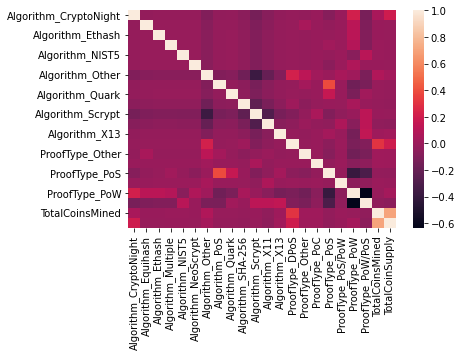

In [33]:
corrs = df_clean2.corr()
sns.heatmap(corrs)
plt.show()

In [34]:
corrs

,Algorithm_CryptoNight,Algorithm_Equihash,Algorithm_Ethash,Algorithm_Multiple,Algorithm_NIST5,Algorithm_NeoScrypt,Algorithm_Other,Algorithm_PoS,Algorithm_Quark,Algorithm_SHA-256,Algorithm_Scrypt,Algorithm_X11,Algorithm_X13,ProofType_DPoS,ProofType_Other,ProofType_PoC,ProofType_PoS,ProofType_PoS/PoW,ProofType_PoW,ProofType_PoW/PoS,TotalCoinsMined,TotalCoinSupply
Algorithm_CryptoNight,1.000000,-0.029235,-0.025246,-0.025246,-0.026637,-0.026637,-0.099943,-0.034965,-0.030458,-0.060606,-0.138778,-0.076749,-0.034965,-0.025246,-0.033889,-0.014493,-0.085094,-0.011822,0.213896,-0.135891,0.046358,0.191816
Algorithm_Equihash,-0.029235,1.000000,-0.019928,-0.019928,-0.021026,-0.021026,-0.078890,-0.027600,-0.024042,-0.047840,-0.109545,-0.060582,-0.027600,-0.019928,0.047370,-0.011440,-0.032941,-0.009332,0.117920,-0.107266,-0.015083,-0.017729
Algorithm_Ethash,-0.025246,-0.019928,1.000000,-0.017208,-0.018157,-0.018157,-0.068124,-0.023834,-0.020761,-0.041311,-0.094596,-0.052315,-0.023834,-0.017208,-0.023100,-0.009879,-0.018594,-0.008058,0.116485,-0.092628,-0.015022,-0.016379
Algorithm_Multiple,-0.025246,-0.019928,-0.017208,1.000000,-0.018157,-0.018157,-0.068124,-0.023834,-0.020761,-0.041311,-0.094596,-0.052315,-0.023834,-0.017208,-0.023100,-0.009879,0.020816,-0.008058,0.087171,-0.092628,-0.005533,-0.011111
Algorithm_NIST5,-0.026637,-0.021026,-0.018157,-0.018157,1.000000,-0.019157,-0.071878,-0.025147,-0.021905,-0.043588,-0.099808,-0.055198,-0.025147,-0.018157,-0.024372,-0.010423,-0.023776,-0.008502,-0.068859,0.107892,-0.004300,-0.014702
Algorithm_NeoScrypt,-0.026637,-0.021026,-0.018157,-0.018157,-0.019157,1.000000,-0.071878,-0.025147,-0.021905,-0.043588,-0.099808,-0.055198,-0.025147,-0.018157,-0.024372,-0.010423,-0.061199,-0.008502,0.070324,-0.009608,-0.014830,-0.020049
Algorithm_Other,-0.099943,-0.078890,-0.068124,-0.068124,-0.071878,-0.071878,1.000000,-0.094352,-0.082190,-0.163542,-0.374485,-0.207103,-0.094352,0.216966,0.123817,0.022265,-0.005956,0.043194,0.013378,-0.122855,0.074396,0.035069
Algorithm_PoS,-0.034965,-0.027600,-0.023834,-0.023834,-0.025147,-0.025147,-0.094352,1.000000,-0.028755,-0.057216,-0.131015,-0.072456,-0.033010,-0.023834,0.030582,-0.013682,0.382008,-0.011161,-0.163469,-0.128290,-0.020827,-0.027379
Algorithm_Quark,-0.030458,-0.024042,-0.020761,-0.020761,-0.021905,-0.021905,-0.082190,-0.028755,1.000000,-0.049841,-0.114127,-0.063117,-0.028755,-0.020761,-0.027869,-0.011918,0.160438,-0.009722,-0.117913,0.017436,-0.018368,-0.023895
Algorithm_SHA-256,-0.060606,-0.047840,-0.041311,-0.041311,-0.043588,-0.043588,-0.163542,-0.057216,-0.049841,1.000000,-0.227091,-0.125589,-0.057216,0.009563,-0.055454,-0.023715,-0.015071,-0.019345,0.046529,-0.013505,-0.025781,-0.034459


Dimensionality Reduction

[0.492, 0.115, 0.087, 0.081, 0.059, 0.048, 0.031, 0.016, 0.011, 0.009, 0.008, 0.008, 0.006, 0.006, 0.005, 0.005, 0.005, 0.005, 0.002, 0.001, 0.0, 0.0]


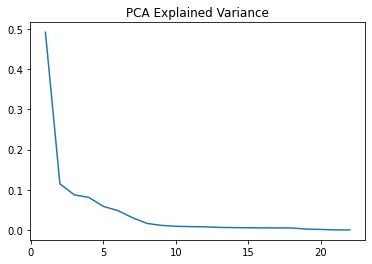

In [36]:
# PCA- all features
pca1 = PCA(n_components=len(df_clean2.columns))
pca1.fit(df_clean2)

print([round(x, 3) for x in pca1.explained_variance_ratio_])
plt.plot(range(1,len(df_clean2.columns)+1), pca1.explained_variance_ratio_)
plt.title("PCA Explained Variance")
plt.show()

[0.492, 0.115, 0.087, 0.081, 0.059, 0.048, 0.031, 0.016, 0.011, 0.009, 0.008, 0.008, 0.006, 0.006, 0.005, 0.005, 0.005]


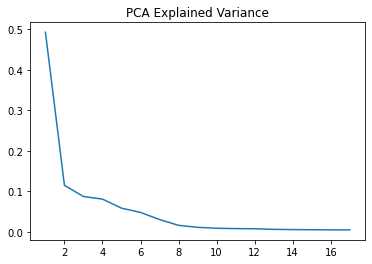

In [37]:
#PCA- 99% variance
pca99 = PCA(n_components=0.99)
pca99.fit(df_clean2)

print([round(x, 3) for x in pca99.explained_variance_ratio_])
plt.plot(range(1, len(pca99.explained_variance_ratio_)+1), pca99.explained_variance_ratio_)
plt.title("PCA Explained Variance")
plt.show()

[0.492, 0.115, 0.087, 0.081, 0.059, 0.048, 0.031]


Text(0.5, 1.0, 'PCA Explained Variance')

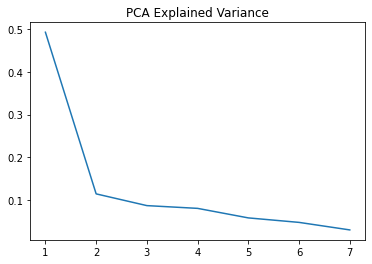

In [38]:
#PCA- 90% variance
pca90 = PCA(n_components=0.90)
pca90.fit(df_clean2)

print([round(x, 3) for x in pca90.explained_variance_ratio_])
plt.plot(range(1, len(pca90.explained_variance_ratio_)+1), pca90.explained_variance_ratio_)
plt.title("PCA Explained Variance")


In [39]:
pca_df = pd.DataFrame(pca90.transform(df_clean2))
pca_df.columns = ["Feature1", "Feature2", "Feature3", "Feature4", "Feature5", "Feature6", "Feature7"]
pca_df.head()

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7
0,-0.215075,-0.851169,0.370385,-0.505652,-0.063666,-0.218878,0.003538
1,-0.193185,-0.853488,0.361160,-0.510568,-0.064135,-0.217534,0.003764
2,3.525439,-0.390118,2.540537,1.483151,-0.204943,-0.064597,0.221616
3,-0.184518,0.677731,-0.116636,-0.001735,-0.228632,0.355122,0.818277
4,-0.177454,0.673994,-0.094216,-0.054257,-0.181178,0.202128,0.115713


In [40]:
pca_df99 = pd.DataFrame(pca99.transform(df_clean2))
pca_df99.columns = ["Feature1", "Feature2", "Feature3", "Feature4", "Feature5", "Feature6", "Feature7", "Feature8", "Feature9", "Feature10", "Feature11", "Feature12", "Feature13", "Feature14", "Feature15", "Feature16", "Feature17"]
pca_df99.head()

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Feature13,Feature14,Feature15,Feature16,Feature17
0,-0.215075,-0.851169,0.370385,-0.505652,-0.063666,-0.218878,0.003538,-0.002092,-0.021653,-0.051596,0.019784,-0.009079,0.019820,-0.013568,0.013291,0.008476,0.028189
1,-0.193185,-0.853488,0.361160,-0.510568,-0.064135,-0.217534,0.003764,-0.001654,-0.022030,-0.051801,0.019751,-0.009148,0.019871,-0.013740,0.013180,0.007570,0.028307
2,3.525439,-0.390118,2.540537,1.483151,-0.204943,-0.064597,0.221616,0.392207,-0.018560,0.789217,-0.240176,-0.224392,-0.092802,-0.085523,-0.024140,0.010881,-0.041911
3,-0.184518,0.677731,-0.116636,-0.001735,-0.228632,0.355122,0.818277,-0.367136,-0.008899,0.027596,-0.005990,-0.029591,-0.034908,-0.030220,-0.019980,-0.020138,-0.025446
4,-0.177454,0.673994,-0.094216,-0.054257,-0.181178,0.202128,0.115713,0.317220,0.021633,0.115386,0.154080,0.102590,-0.116498,0.215758,-0.162784,0.195841,0.209178


#Explanation of difference: The PCA for 99% expected variance brought out 27 features from the data set. This showed a distint elbow at two and a minor elbow at 8. This implies that two clusters might be best for the data,but eight is an argueable analysis. When looking at the PCA for 90%, the elbow is less distinct and only seven features are analyzed. The 90% also shows an elbow at 2, and slight elbow at four implying a possibility of four clusters in the data. While the TSNE and KMeans will give more information, it is possible that this data does not cluster well. 

In [52]:
#TSNE
tsne = TSNE(random_state=42)
tsne_features = tsne.fit_transform(pca_df)
print(tsne_features.shape)

tsne_df = pd.DataFrame(tsne_features, columns=["Feature1", "Feature2"])
tsne_df.head()

(532, 2)


,Feature1,Feature2
0,-14.517035,9.448708
1,-10.594268,14.028905
2,2.664710,2.718616
3,2.556089,-34.698666
4,-2.408656,-25.062155


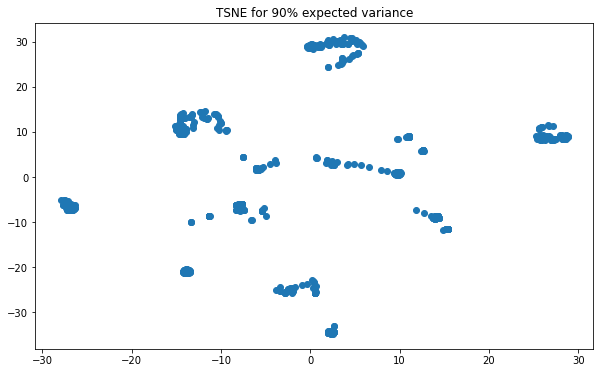

In [53]:
#Scatter plot
plt.figure(figsize=(10,6))
plt.scatter(tsne_df["Feature1"], tsne_df["Feature2"])
plt.title("TSNE for 90% expected variance")
plt.show()

In [46]:
#TSNE 99% for comparison
tsne99 = TSNE(random_state=42)
tsne_features = tsne99.fit_transform(pca_df99)
print(tsne_features.shape)

tsne_df99 = pd.DataFrame(tsne_features, columns=["Feature1", "Feature2"])
tsne_df99.head()

(532, 2)


,Feature1,Feature2
0,-19.259192,15.013076
1,-25.758383,10.665442
2,5.267368,-14.159587
3,14.759538,14.348707
4,15.343110,-6.723194


<function matplotlib.pyplot.show(close=None, block=None)>

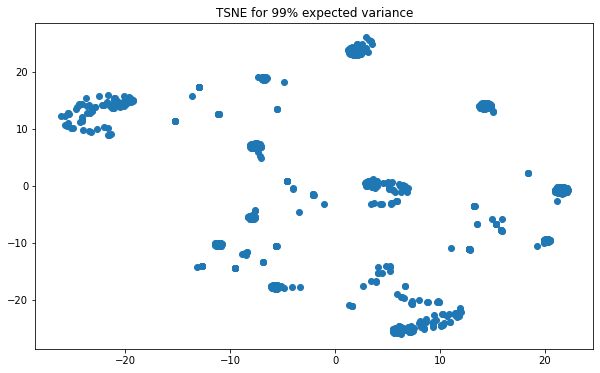

In [47]:
#Scatter plot
plt.figure(figsize=(10,6))
plt.scatter(tsne_df99["Feature1"], tsne_df99["Feature2"])
plt.title("TSNE for 99% expected variance")
plt.show()

In [54]:
#K-Means
inertia =[]
k= list(range(1, 11))

for x in k:
    km= KMeans(n_clusters=x, random_state=42)
    km.fit(pca_df)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,1682.304407
1,2,998.440060
2,3,798.818926
3,4,591.774573
4,5,475.338474


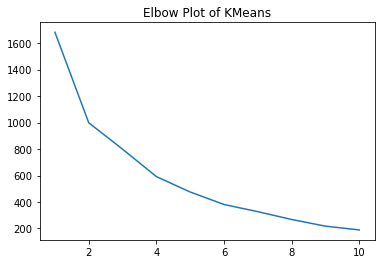

In [55]:
plt.plot(df_elbow["k"], df_elbow["inertia"])
plt.title("Elbow Plot of KMeans")
plt.show()

In [50]:
#KMeans for 99%
inertia =[]
k= list(range(1, 11))

for x in k:
    km= KMeans(n_clusters=x, random_state=42)
    km.fit(pca_df99)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,1829.351411
1,2,1145.440637
2,3,943.607207
3,4,738.363935
4,5,643.354625


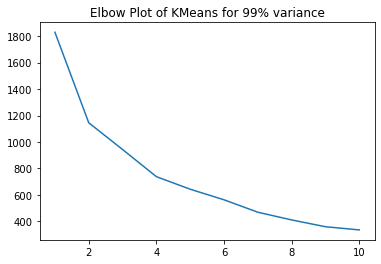

In [51]:
plt.plot(df_elbow["k"], df_elbow["inertia"])
plt.title("Elbow Plot of KMeans for 99% variance")
plt.show()

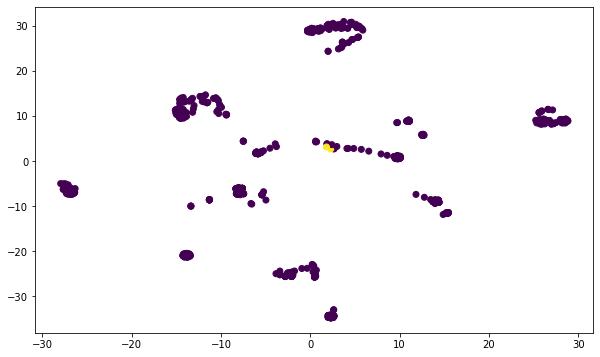

In [57]:
#Model with k=2 (most distict elbow) for 90% variance
k=2
model= KMeans(n_clusters=k, random_state=42)
model.fit(pca_df)
k_labels = model.predict(pca_df)

plt.figure(figsize=(10,6))
plt.scatter(tsne_df["Feature1"], tsne_df["Feature2"], c=k_labels)
plt.show()

In [58]:
df_coins = pd.DataFrame()
df_coins["CoinType"] = df_CoinID
df_coins["Cluster"] = k_labels
df_coins

,CoinType,Cluster
0,42,0
1,404,0
2,1337,0
3,BTC,0
4,ETH,0
5,LTC,0
6,DASH,0
7,XMR,0
8,ETC,0
9,ZEC,0


The TSNE analysis shows that there are not distinct clusters of the data. This data does not cluster well based up the features focused on in the PCA analysis. This holds for both the 99% expected variance, and the 90%. KMeans reinforces that this data does not cluster well with the shape of the elbow plot. 

MY recommendation to clients is that crytocurrency can not be clusters in a meaningful way. Perhaps analyzing two groups of data (since two is the most common feature comparison) will allow for more detailed clustering or predictive grouping in the data. Only two coin type are in one cluster, while the rest are clustered together. Removing these coins and analyzing the data might give different results. 